In [11]:
using Images
using Colors
using FileIO
using Interpolations
using Plots

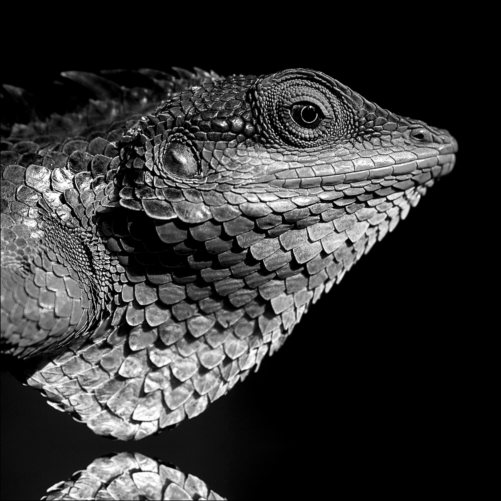

In [24]:
# specify the path to your local image file
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

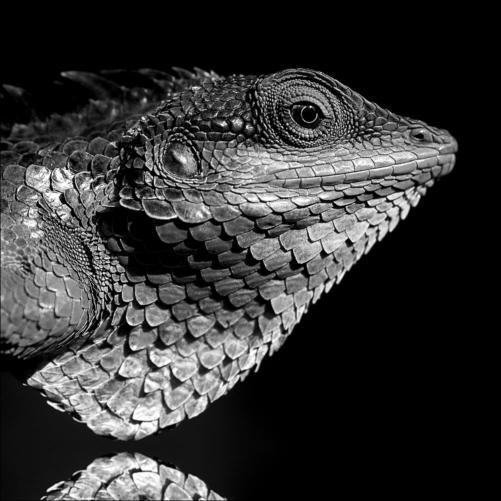

In [3]:
width, height= size(img_grey)
img2 = zeros(Gray{Float64},width, height)
for i in 1:width
   for j in 1:height
      img2[i,j] = img_grey[i,j]
   end
end
img2

In [23]:
i = N0f8(0.32)
j = Int16(i*255)

82

hello world
  397.919 ms (6 allocations: 183.11 MiB)


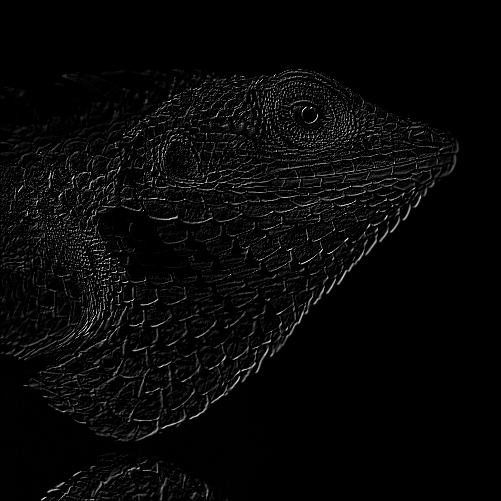

In [30]:
using BenchmarkTools
include("imageops.jl")

hellow()
@btime sobel(img_grey)

# save("image.jpg", im)

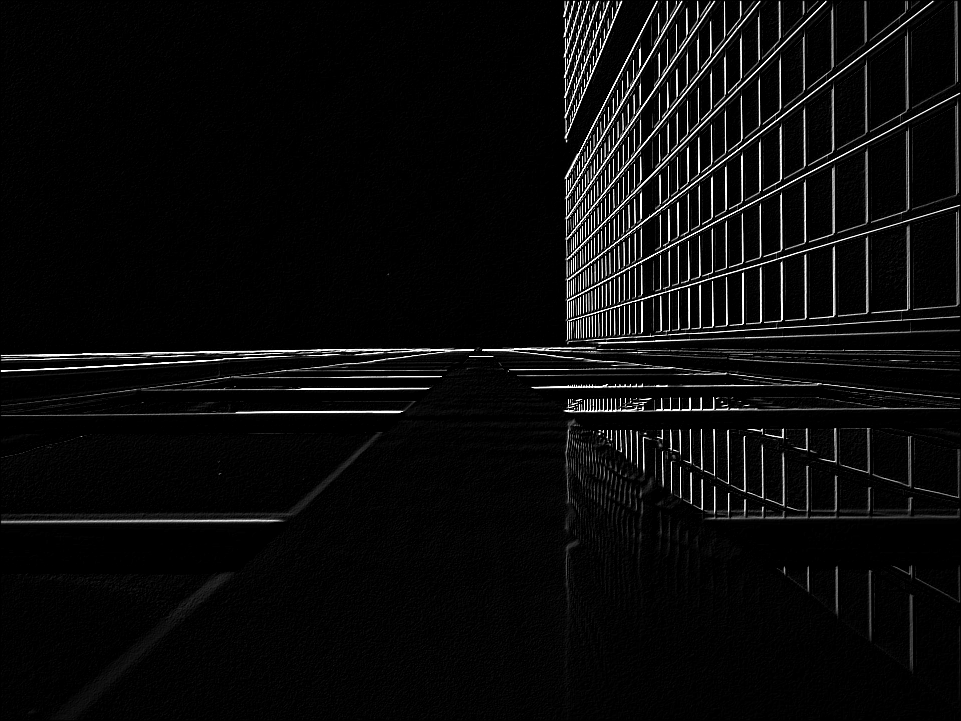

In [34]:
include("imageops.jl")
img_path = "./images/input/house.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)
sobel_img = sobel(img_grey)

In [35]:
acc_matrix = hugh_transform_accumulator_matrix(sobel_img, (100,100))


100×100 Matrix{Float32}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

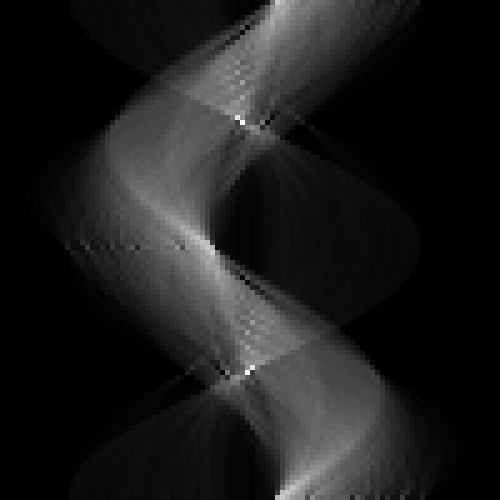

In [36]:
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [37]:
top_k = get_top_k_from_acc_matrix(acc_matrix, 10, size(sobel_img))


10-element Vector{NTuple{4, Float32}}:
 (2.576106, -27.1529, -5.05873, -50.674778)
 (3.6442475, 1330.4921, -2.4897428, -2761.7683)
 (2.638938, -2.2737368f-13, -6.1277323, -4.7197093f-13)
 (3.5814157, 1357.645, -3.3909762, -3188.612)
 (2.7017698, 27.1529, -7.641197, 63.772263)
 (3.518584, -1330.4921, -4.8535004, 3614.2422)
 (3.015929, -705.9754, -71.57597, -5632.788)
 (3.2044249, 651.6696, -237.73926, -10378.413)
 (3.078761, -678.8225, -269.53357, -10810.959)
 (3.1415927, 678.8225, -1.3084308f14, -7.7648246f9)

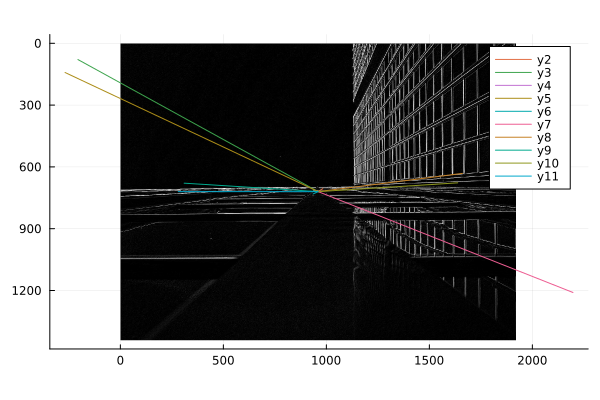

In [43]:
p = plot(sobel_img)
(h,w) = size(sobel_img)
for (phi,r,m,n) in top_k
    plot!([w÷2, w÷2 + cos(phi) * r],[h÷2, h÷2+sin(phi) * r])
    # plot!(x-> clamp(m*(x-(w÷2)) + n + (h÷2), 0, h), 0, w, w=5, legend=false)
end
p